# Observations for the night September 07th 2021 : Use QuickLookExp


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/09/09


In [8]:
#! eups list -s

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [10]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [11]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [12]:
FLAG_SAVE_IMAGE=True

In [13]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [14]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  _parent	 ref_cats
CALIB_OLD  calibrations  Fossil     _parent.old  rerun


In [15]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 icExp
drwxrwsrwx  7 49813 1363  4096 Jul  7 01:31 icSrc
drwxrwsrwx  4 49813 1363  4096 May 13 17:15 postISRCCD
drwxrwsrwx 68 49813 1363 32768 Sep  8 22:56 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16 20:28 repositoryCfg.yaml_backup
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 spectractorOutput


In [33]:
!ls /project/shared/auxTel/rerun/quickLook/quickLookExp/d2021-09-07 -l

total 4815872
-rw-r--r-- 1 49813 1363 108501120 Sep  7 19:37 quickLookExp-d2021-09-07-s00001.fits
-rw-r--r-- 1 49813 1363 102300480 Sep  7 19:39 quickLookExp-d2021-09-07-s00002.fits
-rw-r--r-- 1 49813 1363 108486720 Sep  7 20:05 quickLookExp-d2021-09-07-s00003.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  7 20:06 quickLookExp-d2021-09-07-s00004.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  7 20:06 quickLookExp-d2021-09-07-s00006.fits
-rw-r--r-- 1 49813 1363 108489600 Sep  7 20:07 quickLookExp-d2021-09-07-s00008.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  7 20:07 quickLookExp-d2021-09-07-s00012.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  7 20:07 quickLookExp-d2021-09-07-s00014.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  7 20:08 quickLookExp-d2021-09-07-s00021.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  7 20:08 quickLookExp-d2021-09-07-s00027.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  7 20:08 quickLookExp-d2021-09-07-s00030.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  7 20:09 quickLookExp-d2

# Configuration

## Location and date

In [16]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-09-07"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 613


# Selection

In [17]:
DISPERSER_SEL="holo4_003"

# Information from reporter

In [18]:
print(reporter.getObservedObjects())

['V* XX Scl', 'HD   9048', 'HD   1676', 'HD   2678', 'HD  14208', 'HD 186582', 'HD 207612', 'HD 210823', 'HD 189513', 'HD 196986', 'HD  17400', 'HD  21979', 'HD 205147', 'V* KP Aqr', 'HD 192716', 'HD 171991', 'HD 186286', 'HD  12943', 'HD  14127', 'HD   6928', 'HD 198670', 'HD 196155', 'HD 215957', 'HD  20879', 'HD 218575', 'HD 185199', 'HD 221984', 'HD 178496', 'V* KM Aqr', 'HD 207314', 'HD  20433', 'HD 214204', 'HD 166925', 'ADS 15480 AB', 'HD 171257', 'HD   9201', 'HD 186170', 'HD  20352', 'HD 217728', 'HD   7754', 'HD 193750', 'HD  10106', 'HD   3363', 'HD 182811', 'HD 191788', 'V* GH Peg', 'HD  29815', 'HD   2060', 'HD  27502', 'HD 220346', 'HD 215915', 'HD 205489', 'HD   4070', 'HD 221001', 'HD 206095', 'HD    581', 'HD  14114', 'HD 212304', 'HD 218140', 'HD   2241', 'HD  30344', 'HD 202327', 'HD 222244', 'HD185975', 'V* BM Mic', 'HD 161411', 'HD 202751', 'HD 195677', 'HD  25096', 'HD 213774', 'HD  22146', 'HD 214845', 'HD  27556', 'HD 223067', 'HD 174086', 'HD 184419', 'HD  1481

In [19]:
#reporter.makePolarPlotForObjects()

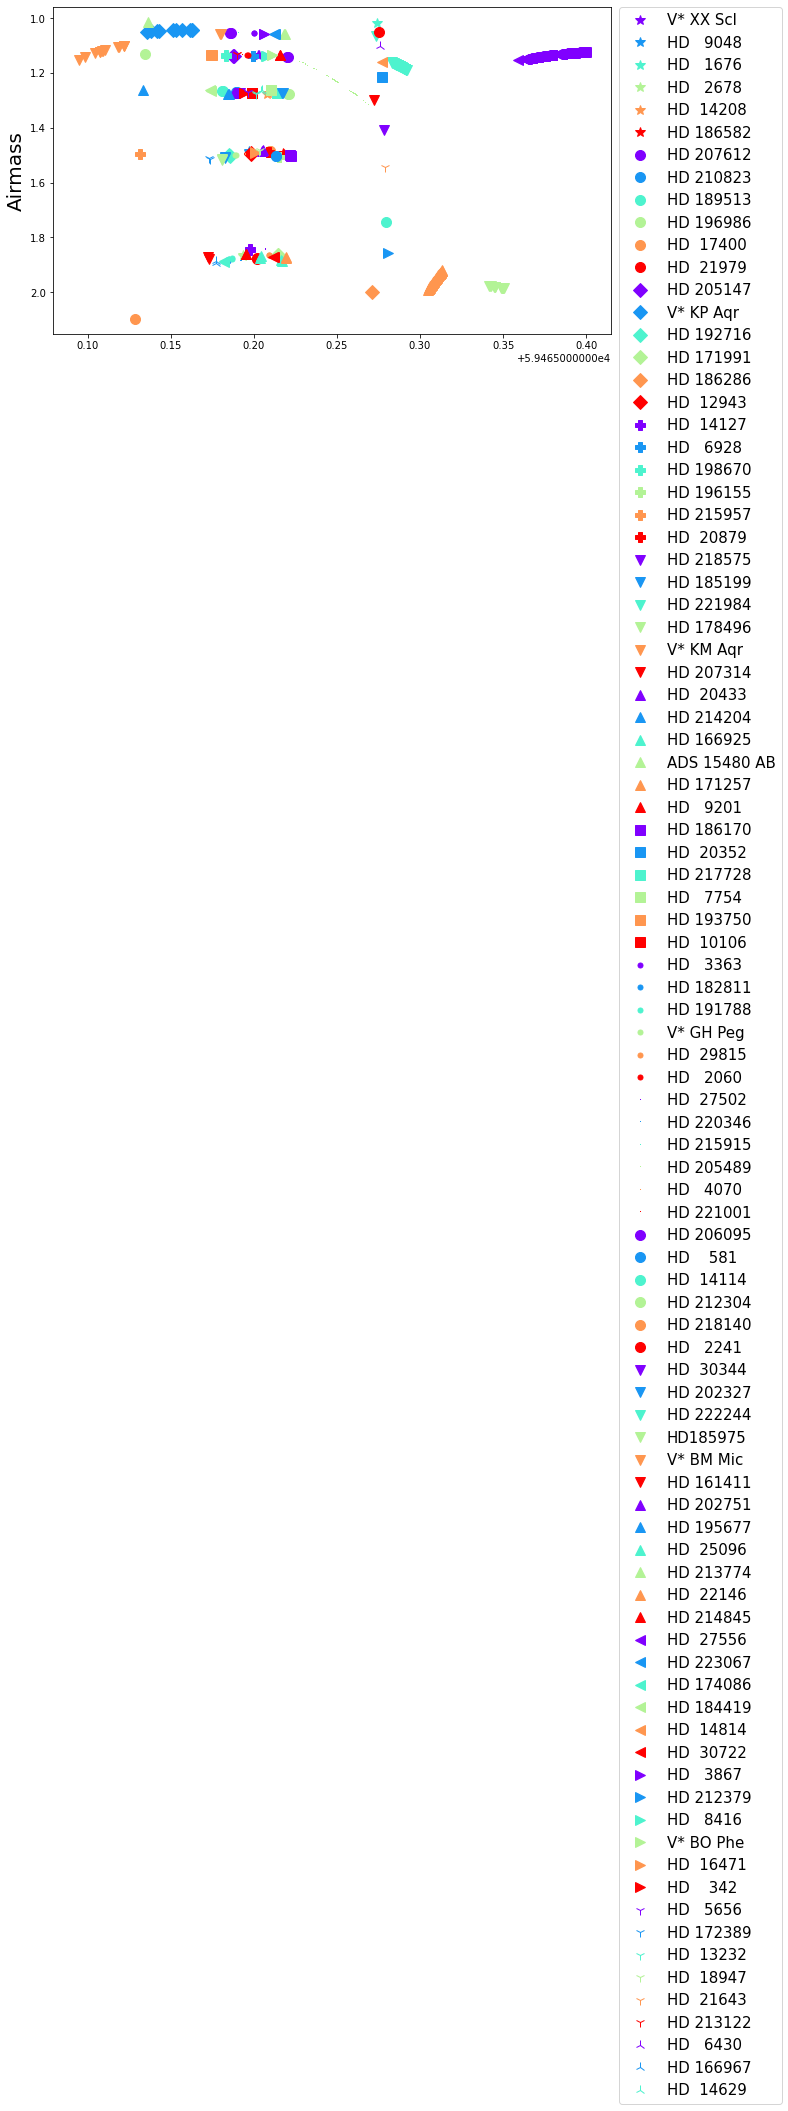

In [20]:
reporter.plotPerObjectAirMass()

In [21]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      Park position 19:37:56.051 FELH0600~holo4_003           0.0  0.00
   2 engtest   Park position 19:39:17.156 FELH0600~holo4_003          81.1  2.00
   3 bias      FlatField position 20:06:00.141 FELH0600~holo4_003        1603.0  0.00
   4 bias      FlatField position 20:06:33.857 FELH0600~holo4_003          33.7  0.00
   5 bias      FlatField position 20:06:38.358 FELH0600~holo4_003           4.5  0.00
   6 bias      FlatField position 20:06:42.856 FELH0600~holo4_003           4.5  0.00
   7 bias      FlatField position 20:06:47.357 FELH0600~holo4_003           4.5  0.00
   8 bias      FlatField position 20:06:51.857 FELH0600~holo4_003           4.5  0.00
   9 bias      FlatField position 20:06:56.352 FELH0600~holo4_003           4.5  0.00
  10 bias      FlatField position 20:07:00.852 FELH0600~holo4_003           4.5  0.00
  11 bias      FlatField position 20:07:05.349 FELH0600~holo4_003          

# Butler

## Configuration for Butler

In [22]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

In [23]:
# Series 1
all_myseq_holo=range(234,310)
# series 2
#all_myseq_holo=range(315,366)
all_myseq=all_myseq_holo

In [24]:
seqNum=all_myseq_holo[0]

In [25]:
seqNum

234

## Display

In [26]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_09_07',url=os.environ["FIREFLY_URL"])

In [27]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [28]:
# and this command show the image
display1.mtv(raw)

In [29]:
display1.getClient().display_url()

## Access to image sequence

In [30]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 6, 8, 5, 7, 12, 14, 13, 10, 11, 9, 17, 18, 21, 19, 15, 20, 16, 22, 27, 25, 26, 28, 30, 23, 24, 29, 35, 34, 37, 33, 31, 32, 36, 44, 38, 43, 42, 40, 39, 41, 45, 49, 51, 48, 47, 46, 50, 53, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 66, 67, 65, 72, 70, 71, 69, 73, 74, 75, 80, 77, 76, 79, 78, 82, 83, 81, 84, 86, 87, 85, 88, 90, 92, 89, 93, 91, 96, 95, 97, 98, 94, 102, 104, 103, 100, 99, 101, 105, 108, 106, 107, 109, 112, 111, 110, 113, 114, 117, 115, 116, 120, 119, 121, 118, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [31]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

NoResults: No locations for get: datasetType:quickLookExp dataId:DataId(initialdata={'dayObs': '2021-09-07', 'seqNum': 234}, tag=set())

In [ ]:
exp_image=exp.image.array

In [ ]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(exp_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(exp_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [ ]:
type(exp_image)

In [ ]:
exp_image.shape

In [ ]:
plt.imshow(exp_image)

## Meta Data

In [ ]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [ ]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
del md['HASTART']
md['HA'] = ha

In [ ]:
md.toDict()

# Start

In [ ]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [ ]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_exp_array.append(np.copy(exp.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

In [ ]:
#idx=0
#for exp_img in all_my_exp_array:
#    print(idx,"......" ,exp_img.shape)
#    idx+=1

## Total number of images

In [ ]:
NSEL=len(all_my_exp_array)

In [ ]:
NSEL

# Plot

In [ ]:
idx=0

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

In [ ]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [ ]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [ ]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        